## 2-4. 데이터셋 만들기

[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.2_simple_linear_regression.ipynb)

In [2]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)


[1 2 3 4 5]
[ 5  8 11 14 17]


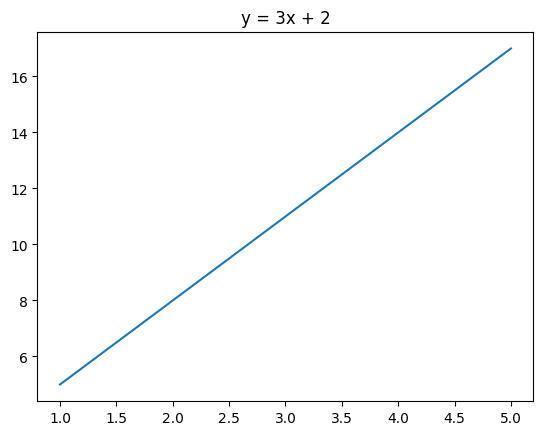

In [4]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

## 2-5-1. 모델 구조

In [6]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [7]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

## 2-5-2. 입력 데이터 형태

In [11]:
import tensorflow as tf 

model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

## 2-5-3. 단순선형회귀 모델 생성

In [14]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

## 2-6. 모델 요약

In [15]:
# 모델 요약
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 2-7. 컴파일

In [19]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_abolute_error'])

In [20]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [22]:
# 클래스 인스턴스 지정
model.compile(
              #optimizer=tf.keras.optimizers.SGD(lr=0.005), 
            optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),  # ← 수정됨
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

## 2-8. 훈련

In [28]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
model.fit(x, y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 4.1884e-05 - mae: 0.0056
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.1599e-05 - mae: 0.0055
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.1320e-05 - mae: 0.0055
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.1037e-05 - mae: 0.0055
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.0760e-05 - mae: 0.0055


In [30]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200


c:\Python\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 188.3783 - mae: 12.7545
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 109.8429 - mae: 9.7734
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 64.0759 - mae: 7.4976
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 37.4048 - mae: 5.7601
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 21.8617 - mae: 4.4337
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.8035 - mae: 3.4210
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.5245 - mae: 2.6478
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.4476 - mae: 2.0574
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.6542 - mae: 1.6066
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.6087 - mae: 1.2623
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9989 - mae: 0.9994
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6432 - mae: 0.7986
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

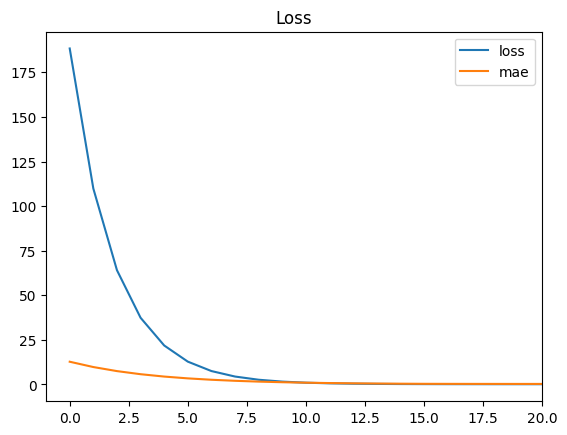

In [31]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## 검증

In [32]:
# 검증
model.evaluate(x, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 4.6996e-05 - mae: 0.0059


[4.699621058534831e-05, 0.0058841705322265625]

## 예측

In [35]:
# 예측
#model.predict([10])
#model.predict(tf.constant([[10.0]]))
model.predict(np.array([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[32.02844]], dtype=float32)